# Algorithms, pre-processing and evaluation metrices used
2. Sector Comparison: Which media sectors use AI the most? 
- Analyze how Top AI-Adopting Industries


In [1]:
%pip install pandas matplotlib seaborn scikit-learn statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_87792/3132211523.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=sector_adoption.values, y=sector_adoption.index, palette='Blues_d', ax=ax1)
/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_87792/3132211523.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=media_df, y='Industry', x='AI Adoption Rate (%)',


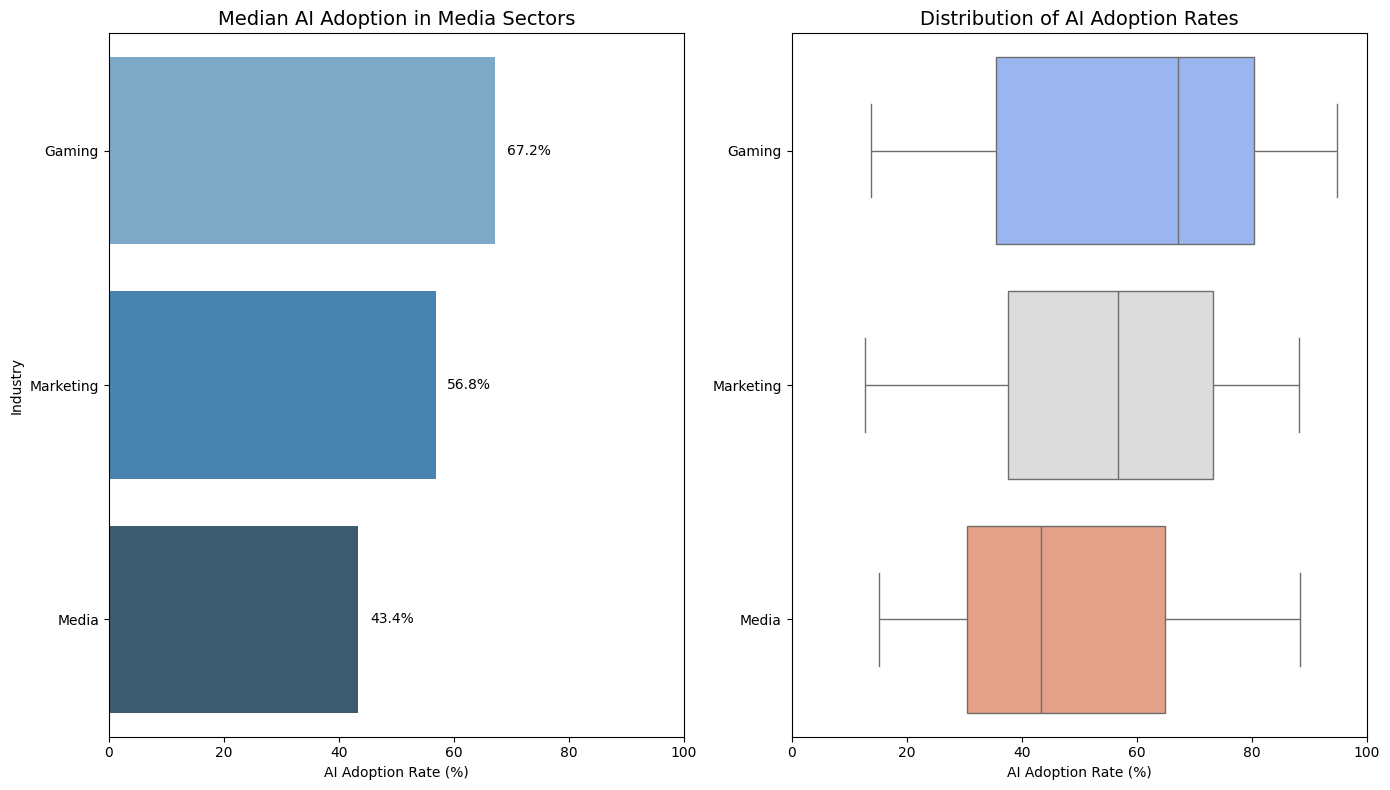


Detailed Statistics:
           count       mean        std    min     25%    50%     75%    max
Industry                                                                   
Gaming      27.0  60.416296  25.943781  13.90  35.500  67.18  80.405  94.76
Marketing   19.0  54.244211  22.910376  12.86  37.615  56.81  73.240  88.16
Media       31.0  47.263226  20.764512  15.20  30.420  43.40  64.860  88.41

Country-Level Median Adoption Rates:
Industry     Gaming  Marketing   Media
Country                               
UK           82.950     73.890     NaN
Japan           NaN     72.590  34.270
France       54.670     65.770  49.970
South Korea  78.260     59.900  35.135
Canada       50.970     59.875  61.490
India        39.040     55.300  47.865
Germany      77.960     51.065  42.100
USA          58.445     45.300  30.365
Australia    76.220     26.170  62.835
China        41.970        NaN  39.220


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')  # Replace with your actual file path

# 1. Filter media-related sectors
media_sectors = ['Gaming', 'Marketing', 'Media']
media_df = df[df['Industry'].isin(media_sectors)]

# 2. Calculate median adoption rates
sector_adoption = media_df.groupby('Industry')['AI Adoption Rate (%)'].median().sort_values(ascending=False)

# 3. Create visualization
plt.figure(figsize=(14, 8))

# Bar plot for median values
ax1 = plt.subplot(121)
bars = sns.barplot(x=sector_adoption.values, y=sector_adoption.index, palette='Blues_d', ax=ax1)
ax1.set_title('Median AI Adoption in Media Sectors', fontsize=14)
ax1.set_xlabel('AI Adoption Rate (%)')
ax1.set_xlim(0, 100)

# Add value annotations
for p in bars.patches:
    width = p.get_width()
    ax1.text(width + 2, p.get_y() + p.get_height()/2, 
            f'{width:.1f}%', 
            va='center', fontsize=10, color='black')

# Box plot for distribution
ax2 = plt.subplot(122)
sns.boxplot(data=media_df, y='Industry', x='AI Adoption Rate (%)', 
        order=sector_adoption.index, palette='coolwarm')
ax2.set_title('Distribution of AI Adoption Rates', fontsize=14)
ax2.set_xlabel('AI Adoption Rate (%)')
ax2.set_ylabel('')
ax2.set_xlim(0, 100)

plt.tight_layout()
plt.savefig('media_sector_ai_adoption.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Additional statistics
print("\nDetailed Statistics:")
print(media_df.groupby('Industry')['AI Adoption Rate (%)'].describe())

# 5. Country-specific analysis
country_analysis = (media_df.groupby(['Country', 'Industry'])
                    ['AI Adoption Rate (%)'].median()
                    .unstack()
                    .sort_values(by='Marketing', ascending=False))

print("\nCountry-Level Median Adoption Rates:")
print(country_analysis)

/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_87792/1515520880.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=media_df, x='Year', y='AI Adoption Rate (%)',


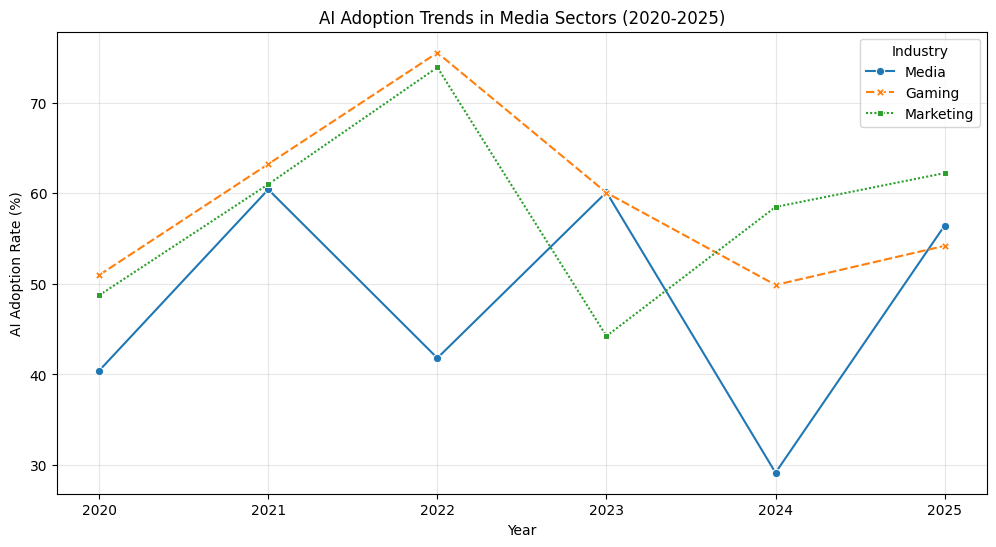

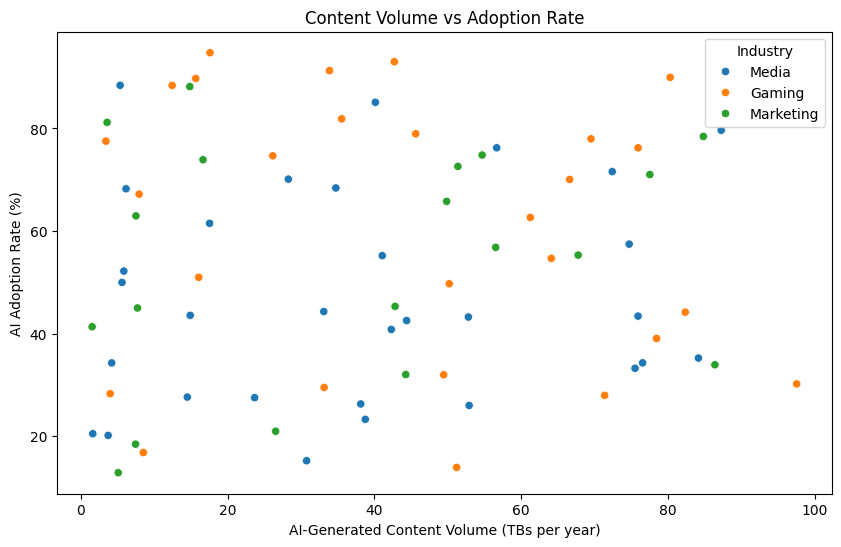

In [3]:
# To add temporal analysis (yearly trends):
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_df, x='Year', y='AI Adoption Rate (%)', 
            hue='Industry', style='Industry', markers=True, ci=None)
plt.title('AI Adoption Trends in Media Sectors (2020-2025)')
plt.grid(alpha=0.3)
plt.show()

# To analyze AI content generation correlation:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=media_df, x='AI-Generated Content Volume (TBs per year)', 
            y='AI Adoption Rate (%)', hue='Industry')
plt.title('Content Volume vs Adoption Rate')
plt.show()

In [6]:
# 1. Data Preprocessing Steps

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')  # Replace with your actual file path

# 1. Handle Missing Data
# Using SimpleImputer to fill missing numerical data with median and categorical with mode
numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[object]).columns

# Impute missing numerical data with median and categorical with mode
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Optional: Scaling numerical data for distance-based algorithms
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# 2. Preprocessing pipeline (both numeric and categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3. Feature Engineering - Create labels (AI Impact Category: High/Medium/Low based on AI Adoption Rate)
# Create new column for AI Impact based on AI Adoption Rate
df['AI Impact'] = pd.cut(df['AI Adoption Rate (%)'], bins=[0, 30, 70, 100], labels=['Low', 'Medium', 'High'])

# 4. Split the data into features and target
X = df.drop(columns=['AI Impact'])  # Features
y = df['AI Impact']  # Target label

# 5. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing on training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



In [7]:
# 2. Classification (Logistic Regression / Decision Trees)
# You can use either Logistic Regression or Decision Trees for classification

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_preprocessed, y_train)

# Decision Tree Classifier
dtree = RandomForestClassifier(n_estimators=100, random_state=42)
dtree.fit(X_train_preprocessed, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test_preprocessed)
y_pred_dtree = dtree.predict(X_test_preprocessed)


Logistic Regression Accuracy: 0.925
Logistic Regression F1 Score: 0.9254182754182754
Decision Tree Accuracy: 1.0
Decision Tree F1 Score: 1.0


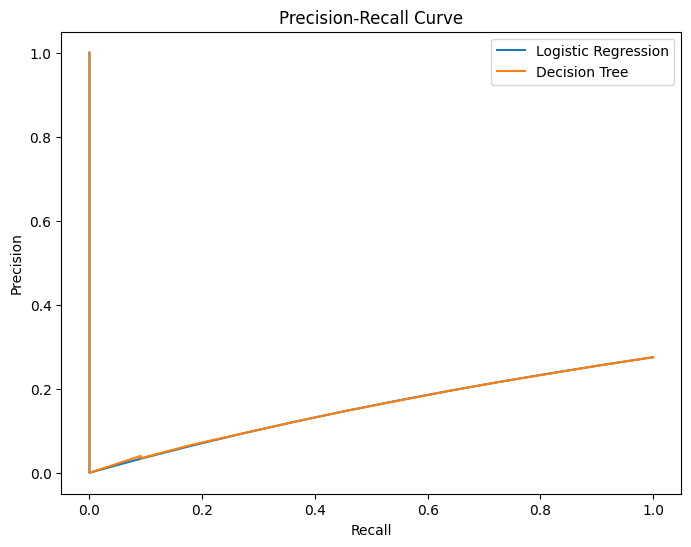

In [8]:
# 3. Evaluation Metrics
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))

# Evaluation Metrics for Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dtree, average='weighted'))

# Precision-Recall Curve
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test_preprocessed)[:, 1], pos_label='High')
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test, dtree.predict_proba(X_test_preprocessed)[:, 1], pos_label='High')

# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.plot(recall_dtree, precision_dtree, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


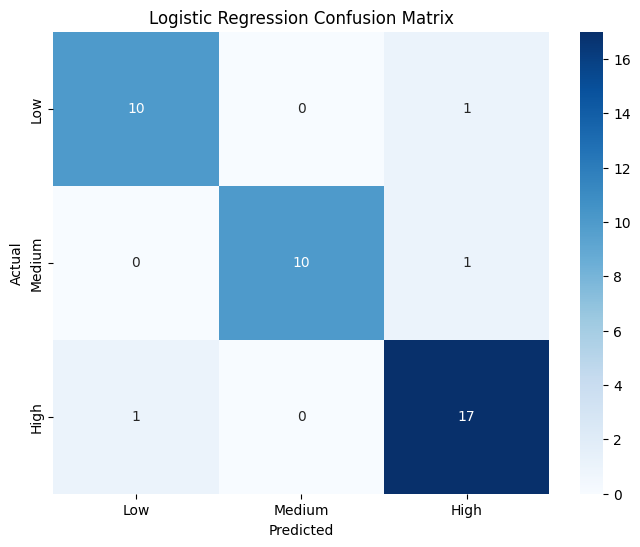

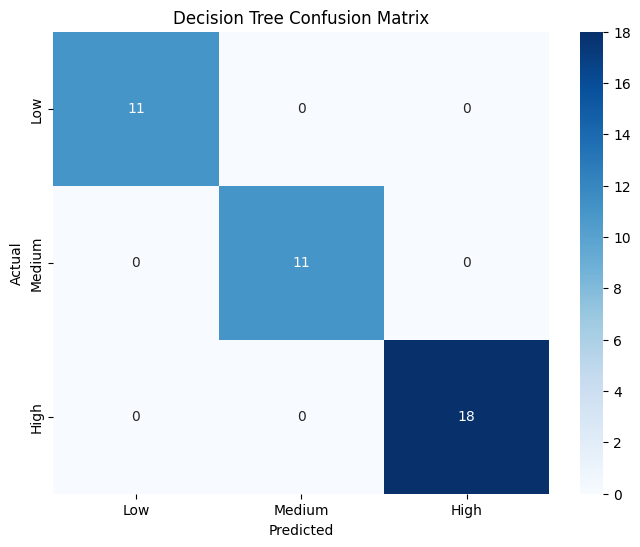

In [9]:
# 4. Visualizing Results
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
# Decision Tree Confusion Matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
# 5. Model Comparison
# Compare the performance of both models
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dtree_accuracy:.2f}")


Logistic Regression Accuracy: 0.93
Decision Tree Accuracy: 1.00
